# Notebook 2 - Working with Raster Data in GemGIS

[GemGIS](https://github.com/cgre-aachen/gemgis) is a package for geographic information processing for geomodeling. In particular, data is prepared for a direct use in [GemPy](https://github.com/cgre-aachen/gempy). The package provides functions to process spatial data such as vector data (shape files, geojson files, geopackages), raster data (tiff-files), data retrieved from WMS Services or KML/XML files. 

At a later stage, functionality will be added to interactively add interfaces and orientations for a model, chosing the extent, defining custom sections and more. In addition, functionality will be provided to export data from GemPy into Geoinformation Systems such as QGIS or ArcGIS and Google Earth. 

# Overview

This notebook will present how existing raster files can be loaded into GemGIS, how new raster files can be created and how to work with raster files in general. The main tool that is going to be used here is [rasterio](https://rasterio.readthedocs.io/en/latest/#).

- [What is Raster Data](#vector)
- [What is rasterio?](#rasterio)
- [What is GemPy?](#gempy)
- [What are Interfaces and Orientations?](#intandor)
- [Downloading and Installing GemGIS](#gemgis)
- [Structure of GemGIS](#structure)
- [Importing Libraries](#import)
- [Version Reports](#vreport)
- [Example 1 - Raster Data - Digital Elevation Model](#ex1)
- [Example 2 - Raster Data - Interpolate Raster](#ex2)
- [Example 3 - Raster Data - Calculating slope, aspect and hillshades](#ex3)
- [Example 4 - Raster Data - Sampling from Raster](#ex4)
- [Example 5 - Clip Raster by Extent](#ex5)
- [Example 6 - Clip Raster by Shape](#ex6)
- [Example 7 - Save Raster as Tiff](#ex7)
- [Example 8 - Additional Manipulation Options](#ex8)

<a id='raster'></a>
## What is raster data?

In its simplest form, a raster consists of a matrix of cells (or pixels) organized into rows and columns (or a grid) where each cell contains a value representing information, such as the height value. Rasters are digital aerial photographs, imagery from satellites, digital pictures, or even scanned maps.

<img src="../data/Images/raster.png" width=300>

- **Rasters as basemaps**: A common use of raster data in a GIS is as a background display for other feature layers.Three main sources of raster basemaps are orthophotos from aerial photography, satellite imagery, and scanned maps. 

- **Rasters as surface maps**: Rasters are well suited for representing data that changes continuously across a landscape (surface). Elevation values measured from the earth's surface are the most common application of surface maps, but other values, such as rainfall, temperature, concentration, and population density, can also define surfaces that can be spatially analyzed.

- **Rasters as thematic maps**: Rasters representing thematic data can be derived from analyzing other data. A common analysis application is classifying a satellite image by land-cover categories. For example, you can process data through a geoprocessing model to create a raster dataset that maps suitability for a specific activity.

Source: https://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/what-is-raster-data.htm

<a id='rasterio'></a>
## What is rasterio?

Rasterio reads and writes geospatial raster datasets. Rasterio employs [GDAL](https://gdal.org/) under the hood for file I/O and raster formatting. Its functions typically accept and return Numpy ndarrays. Rasterio is designed to make working with geospatial raster data more productive and more fun.

For more information see: https://pypi.org/project/rasterio/0.13.2/, https://rasterio.readthedocs.io/en/latest/

<a id='gempy'></a>
## What is GemPy?

`GemPy` is a Python-based, **open-source geomodeling library**. It is
capable of constructing complex **3D geological models** of folded
structures, fault networks and unconformities, based on the underlying
powerful **implicit representation** approach. `GemPy` was designed from the
ground up to support easy embedding in probabilistic frameworks for the
uncertainty analysis of subsurface structures.

Check out the documentation either on the main website (https://www.gempy.org/) or the specific docs site (http://docs.gempy.org/).

- GemPy Installation Help: https://docs.gempy.org/installation.html
- GemPy Tutorials: https://docs.gempy.org/tutorials/index.html
- GemPy Examples: https://docs.gempy.org/examples/index.html
- GemPy Repository: https://github.com/cgre-aachen/gempy
- GemPy Tutorial Video: https://youtu.be/n0btC5Zilyc

<a id='intandor'></a>
## What are Interfaces and Orientations?
`GemPy`is using an implicit modeling approach based on the potential field method to create geological models. The only input data required are interfaces (layer boundaries in outcrops or in wells) and orientations (dip and azimuth values of a given orientation). The necessary information for interfaces are the `X`,`Y` and `Z`coordinates as well as the `formation`. Please be aware that `GemPy` is always referring to the base of a formation! For orientations, `X`,`Y` and `Z`coordinates, the `formation` and `dip`, `azimuth` and a `polarity` values is needed. The polarity is usually set to 1. 

<img src="../data/Images/orientations.jpg" width="300">

Image Source: https://www.geolstuffmnl.com/post/measuring-strike-and-dip

<a id='gemgis'></a>
## Downloading and installing GemGIS

GemGIS is currently under development and only available at https://github.com/cgre-aachen/gemgis. Pip and conda versions including documentation will follow.

<a id='structure'></a>
## Structure of GemGIS

The core of `GemGIS` is made of the `GemPyData` class (`gemgis.py`). Its attributes can directly be utilized by `GemPy` making it easier for users to load data. Methods of the `GemPyData` class allow users to directly set these attributes. Multiple other files contain functions to manipulate vector data, raster data, etc.:

* `gemgis.py` - core file containing the `GemPyData` class
* `vector.py` - file containing functions to manipulate vector data
* `raster.py` - file containing functions to manipulate raster data
* `utils.py` - file containing utility functions frequently used for the manipulation of vector/raster data
* `wms.py` - file containing methods to load WMS services as arrays/rasters
* `visualization.py` - file containing functions to simplify plotting of spatial data


If you have any problems using GemGIS, find a bug or have an idea for a new feature, open an issue at https://github.com/cgre-aachen/gemgis/issues. 


# Importing Libraries

Apart from creating a GemPyData class in later tutorials, GemGIS is working with pure GeoDataFrames, Rasterio files and NumPy arrays to provide the user with easy data handling. ***Currently, geopandas version 0.6.1 is the latest stable version that is supported by GemGIS***. An introduction to working with GeoPandas was provided in the previous notebook.

In [1]:
import sys
sys.path.append('../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Version Reports
Reporting your Python environment's package versions and hardware resources by Scooby - https://github.com/banesullivan/scooby. This overview shows the packages and their versions used to run this notebook. Upgrading or downgrading to older or newer versions may break the notebook.

In [2]:
gg.Report()

--------------------------------------------------------------------------------
  Date: Sat Jul 25 11:47:49 2020 W. Europe Daylight Time

                OS : Windows
            CPU(s) : 24
           Machine : AMD64
      Architecture : 64bit
               RAM : 63.9 GB
       Environment : Jupyter

  Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]

              json : 2.0.9
             numpy : 1.18.5
            scooby : 0.5.2
            owslib : 0.17.0
            pandas : 1.0.5
           shapely : 1.6.4.post1
           pyvista : 0.25.3
          rasterio : 1.0.21
         geopandas : 0.6.1
          requests : 2.24.0
             scipy : 1.5.0
        matplotlib : 3.2.2

  Intel(R) Math Kernel Library Version 2020.0.1 Product Build 20200208 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------

<a id='ex1'></a>
# Example 1 - Raster Data - Digital Elevation Model

As a first example we will have a look at a geological map as shown below. The gray southward dipping layer is surrounded by two white layers. The topography decreases from north to south. A raster file ```raster1.tif``` containing the altitude values was created externally. This data can now be loaded and plotted as shown below. The strength of GemGIS is it that it is working with pure rasterio objects providing you with their full range of functionality.

**What is a Rasterio Object?**
Opening a raster with Rasterio will create a rasterio object containing different attributes such as the raster values, the CRS, the transform and others. 

For more information see: https://rasterio.readthedocs.io/en/latest/quickstart.html#dataset-attributes

**What is a coordinate reference system?**<br>
The Coordinate Reference System (CRS) is important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates relate to places on the Earth.

For more information see: https://geopandas.org/projections.html and https://spatialreference.org/ for codes for most commonly used projections.

For the tutorials `EPSG:4326`(WGS84 latitude-longitude projection) is used. It ranges from -180 to 180 degrees (longitude) and -90 to 90 degrees (latitude). For simplicity it is assumed that the units are meters and not degrees. This implies that the extent of the examples does not relate to the real world but a CRS is needed for transformation purposes. 


For this example we will use the following functions:

- `gg.utils.set_extent(...)`


<img src="../data/Test1/task1.png" width="300">

## Loading data

The raster data will be loaded as a rasterio.io.DataSetReader object. The data is provided in the [repository](https://github.com/cgre-aachen/gemgis). The coordinate reference system (CRS) is stored within the object which is essential to know when transforming data from one CRS to another. 

In [3]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```.

## Inspecting the Raster Object

Rasterio objects have different attributes that can easily be accessed. 

In [4]:
dem.crs

CRS.from_dict(init='epsg:4326')

In [5]:
dem.bounds

BoundingBox(left=-4.440892098500626e-16, bottom=1.3642420526593924e-12, right=971.002897605575, top=1068.1031873661339)

In [6]:
dem.width

250

In [7]:
dem.height

275

In [8]:
dem.count

1

In [9]:
dem.transform

Affine(3.8840115904223, 0.0, -4.440892098500626e-16,
       0.0, -3.8840115904223, 1068.1031873661339)

In [10]:
dem.read(1)

array([[482.82904, 485.51953, 488.159  , ..., 618.8612 , 620.4424 ,
        622.05786],
       [481.6521 , 484.32193, 486.93958, ..., 618.8579 , 620.44556,
        622.06714],
       [480.52563, 483.18893, 485.80444, ..., 618.8688 , 620.4622 ,
        622.08923],
       ...,
       [325.49225, 327.21985, 328.94498, ..., 353.6889 , 360.03125,
        366.3984 ],
       [325.0538 , 326.78473, 328.51276, ..., 351.80603, 357.84106,
        363.96167],
       [324.61444, 326.34845, 328.0794 , ..., 350.09247, 355.87598,
        361.78635]], dtype=float32)

In [11]:
extent = gg.utils.set_extent(0,972,0,1069)
extent

[0, 972, 0, 1069]

## Plotting Data

The raster data can now be plotted next to the geological map without any manipulation by using ```plt.imshow(...)```. Bright values indicate high altitudes, dark colors indicate low altitudes. When plotting the raster it is necessary to provide the extent of the raster as defined above. This way, the raster is scaled to the true extent of the geological map. A second important thing is that the height values of the object can be accessed with ```dem.read(1)``` where 1 is equal to the band number of the raster.

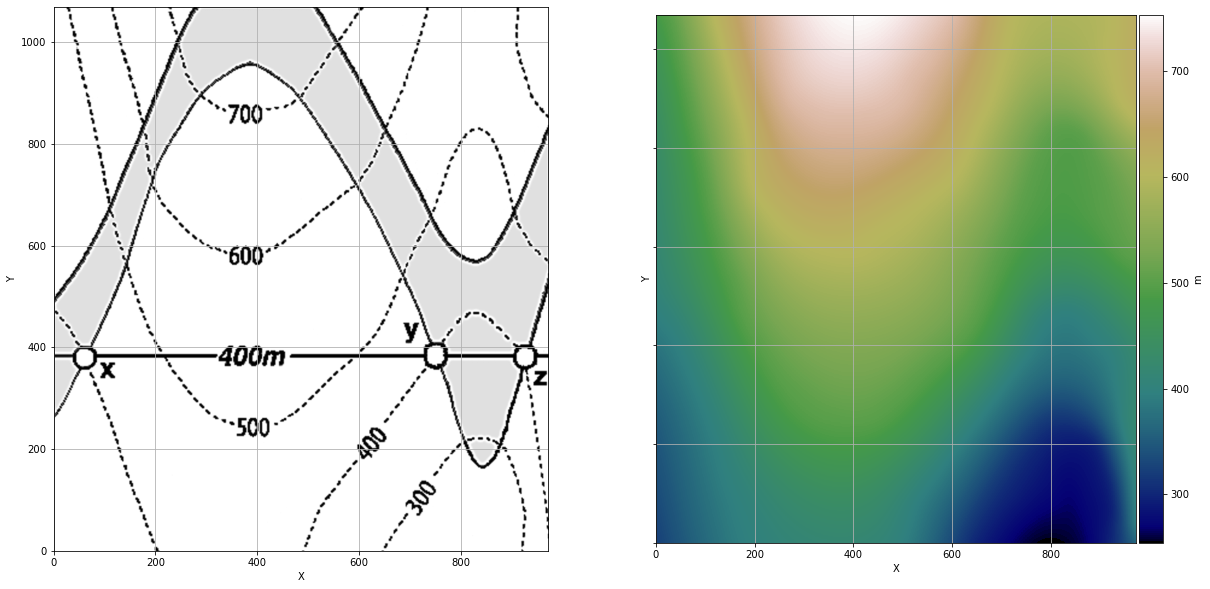

In [12]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
img = ax2.imshow(np.flipud(dem.read(1)), origin = 'lower', cmap ='gist_earth', extent=extent)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

<a id='ex2'></a>
# Example 2 - Raster Data - Interpolating Raster Data

As a second example we will have a look at the same geological map as before. Instead of loading a raster, contour lines with attributed height values are used to interpolate a raster. 

For this example we will use the following functions:

- `gg.utils.set_extent(...)`
- `gg.raster.interpolate(...)`


<img src="../data/Test1/task1.png" width="300">

## Loading data
The raster data will be loaded as a rasterio.io.DataSetReader object. The data is provided in the repository. The coordinate reference system (CRS) is stored within the object which is essential to know when transforming data from one CRS to another. 

In [13]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```.

In [14]:
extent = gg.utils.set_extent(0,972,0,1069)
extent

[0, 972, 0, 1069]

## Inspecting the GeoDataFrame

Rasterio objects have different attributes that can easily be accessed. 

In [15]:
topo.head()

id    Z                                           geometry
0  None  400  LINESTRING (0.741 475.441, 35.629 429.247, 77....
1  None  300  LINESTRING (645.965 0.525, 685.141 61.866, 724...
2  None  400  LINESTRING (490.292 0.525, 505.756 40.732, 519...
3  None  600  LINESTRING (911.433 1068.585, 908.856 1026.831...
4  None  700  LINESTRING (228.432 1068.585, 239.772 1017.037...

In [16]:
topo.crs

{'init': 'epsg:4326'}

## Plotting Data

The raster data can now be plotted next to the geological map without any manipulation by using ```plt.imshow(...)```. Bright values indicate high altitudes, dark colors indicate low altitudes. When plotting the raster it is necessary to provide the extent of the raster as defined above. This way, the raster is scaled to the true extent of the geological map. A second important thing is that the height values of the object can be accessed with ```dem.read(1)``` where 1 is equal to the band number of the raster.

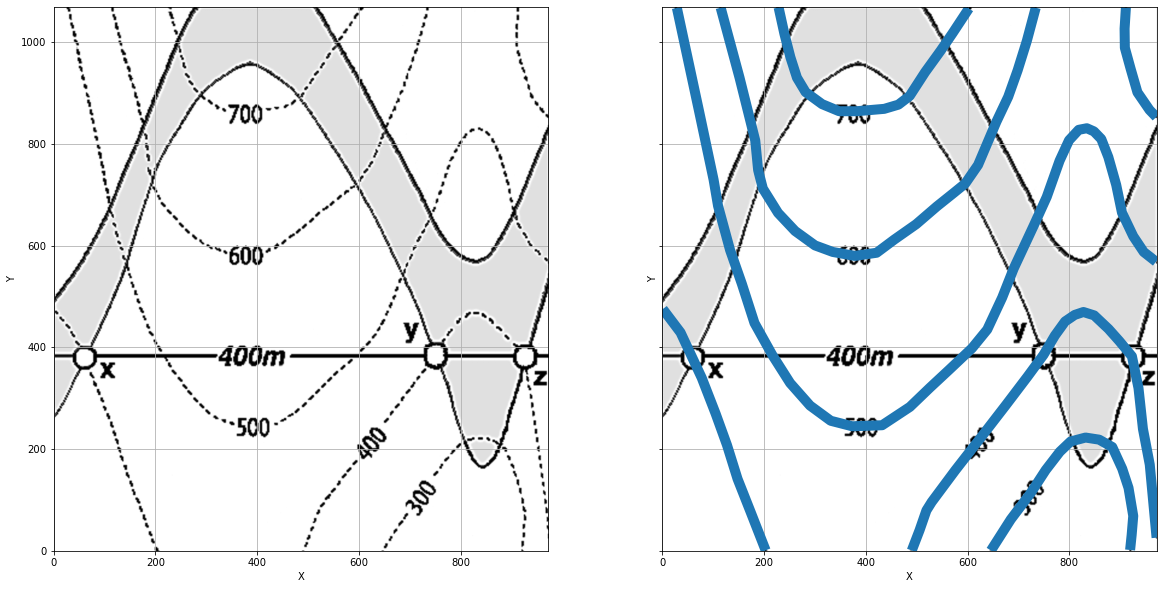

In [17]:
# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
# Plotting the geological map
ax1.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])

# Plotting the geological map
ax2.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
# Plotting the contour lines of the topographic map
topo.plot(ax=ax2, legend = True, linewidth = 10)

ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.grid()
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1]);

## Interpolating the Raster

Several methods have been implemented into GemGIS. These include the methods ```nearest```, ```cubic``` and ```linear``` of ```scipy.interpolate.griddata``` and ```Rbf``` of ```scipy.interpolate.rbf```. The different methods can be accessed by passing the argument ```method= 'method_name'```.

In [18]:
topo_interpolated = gg.vector.interpolate_raster(topo, method='rbf')
topo_interpolated

array([[411.82014581, 411.69052091, 411.56158939, ..., 384.04962954,
        385.42140506, 386.76248969],
       [411.66101945, 411.5316941 , 411.40306465, ..., 384.4299191 ,
        385.80964238, 387.15718098],
       [411.5023835 , 411.37335931, 411.24503355, ..., 384.8252337 ,
        386.21293421, 387.56684012],
       ...,
       [499.18752484, 499.15158818, 499.11692808, ..., 624.97739453,
        625.38574125, 625.79305697],
       [499.53566482, 499.49887905, 499.4633306 , ..., 625.17315916,
        625.58165735, 625.98912699],
       [499.90110024, 499.86421238, 499.82858152, ..., 625.37307284,
        625.78164892, 626.18920124]])

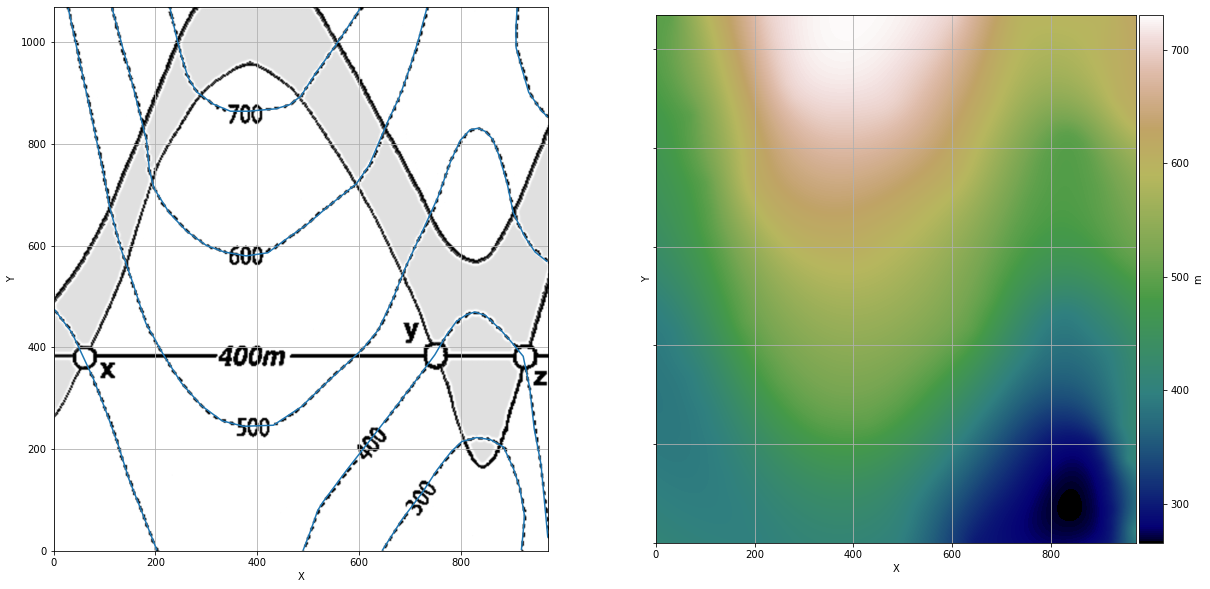

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])
ax1.grid()
img = ax2.imshow(topo_interpolated, origin='lower', cmap = 'gist_earth')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(extent[2],extent[3])
ax2.set_xlim(extent[0],extent[1])
ax2.grid()
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

<a id='ex3'></a>
# Example 3 - Raster Data - Calculating slope, aspect and hillshades

As a third example it is shown how to calculate the slope and aspect of a raster which can then be used to obtain orientations (if the raster is a lithological layer) and hillshades to better visualize the raster data. 

## Loading Data

In [20]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```.

In [21]:
extent = gg.utils.set_extent(0,972,0,1069)
extent

[0, 972, 0, 1069]

## Calculating hillshades

In [22]:
hillshades = gg.raster.calculate_hillshades(dem)

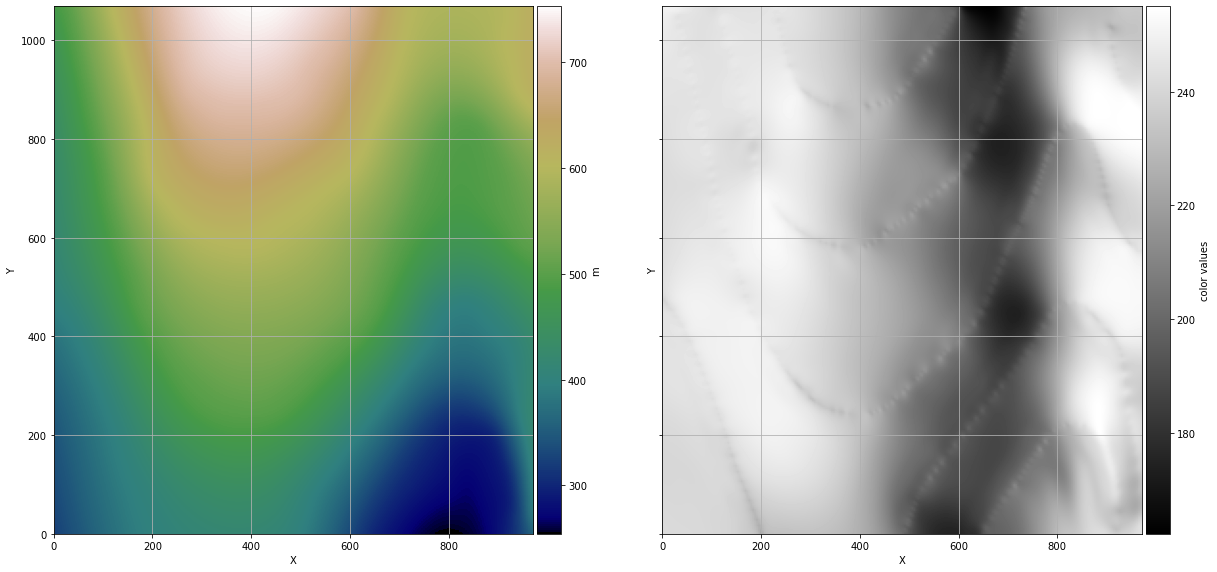

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
arr = ax1.imshow(dem.read(1), cmap = 'gist_earth',extent = extent)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])
ax1.grid()
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(arr, ax=ax1, cax=cax)
cbar.set_label('m')
hill = ax2.imshow(hillshades,cmap = 'gray',extent = extent)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(extent[2],extent[3])
ax2.set_xlim(extent[0],extent[1])
ax2.grid()
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(hill, ax=ax2, cax=cax)
cbar.set_label('color values')

In [ ]:
## Calcaculating slope

In [24]:
slope = gg.raster.calculate_slope(dem)

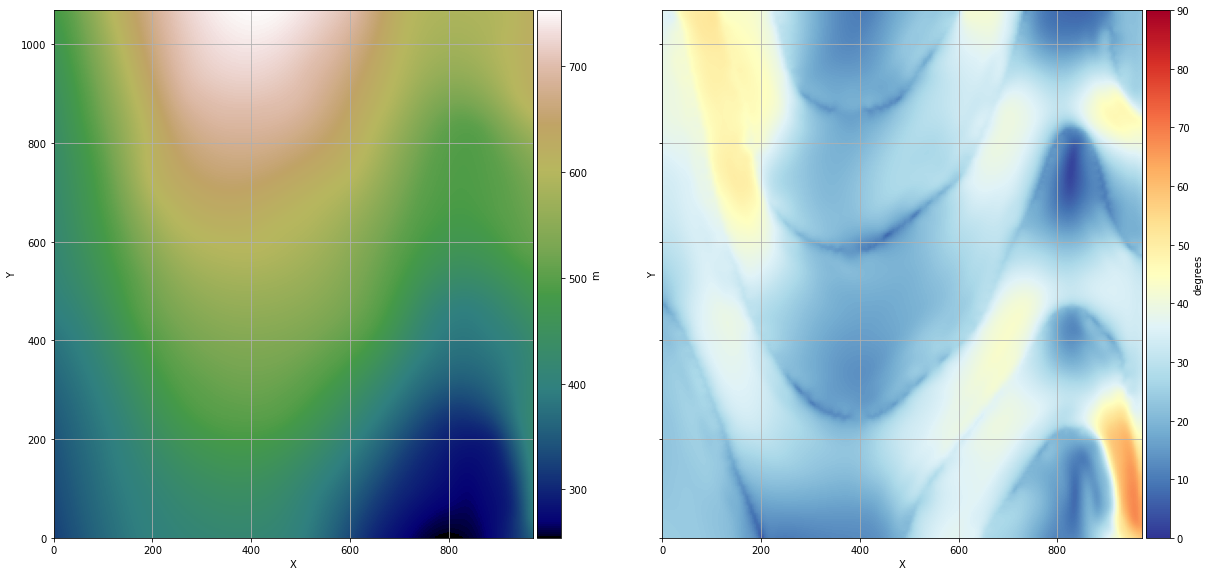

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
arr = ax1.imshow(dem.read(1), cmap = 'gist_earth',extent = extent)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])
ax1.grid()
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(arr, ax=ax1, cax=cax)
cbar.set_label('m')
slopes = ax2.imshow(slope, cmap = 'RdYlBu_r',extent = extent, vmin=0, vmax= 90)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(extent[2],extent[3])
ax2.set_xlim(extent[0],extent[1])
ax2.grid()
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(slopes, ax=ax2, cax=cax)
cbar.set_label('degrees')

## Calculating Aspect

In [26]:
aspect = gg.raster.calculate_aspect(dem)

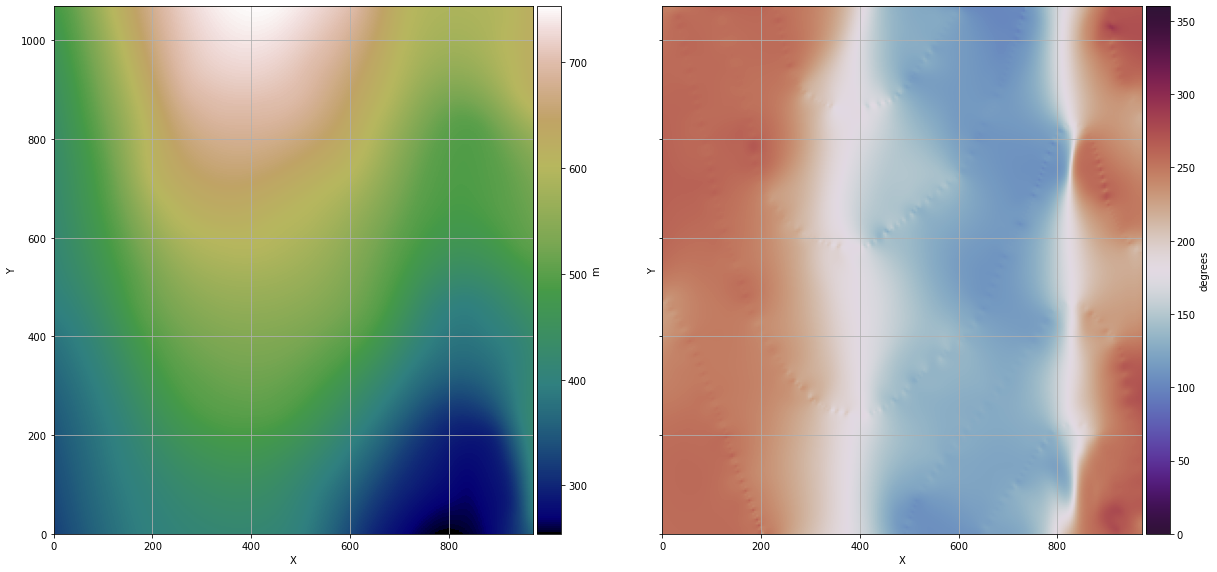

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(20,10))
arr = ax1.imshow(dem.read(1), cmap = 'gist_earth',extent = extent)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])
ax1.grid()
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(arr, ax=ax1, cax=cax)
cbar.set_label('m')
asp = ax2.imshow(aspect, cmap = 'twilight_shifted',extent = extent, vmin=0, vmax=360)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(extent[2],extent[3])
ax2.set_xlim(extent[0],extent[1])
ax2.grid()
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(asp, ax=ax2, cax=cax)
cbar.set_label('degrees')

<a id='ex4'></a>
# Example 4 - Raster Data - Sampling from Raster

As a fourth example we are going to sample values from a raster. Sampling height values from a raster was already utilized in the previous notebook. 

**The following functions will be used:**
- `gg.utils.set_extent(...)`
- `gg.raster.sample(...)`
- `gg.raster.sample_randomly(...)`
- `gg.raster.sample_orientations(...)`
- `gg.raster.sample_interfaces(...)`

## Defining the working/model area extent

Especially when working with unreferenced numpy.ndarrays, it becomes important to provide the extent of these arrays in real world coordinates. The extent can be provided for GemGIS as ```minx, maxx, miny, maxy``` and if a third dimension is available as ```minx, maxx, miny, maxy, minz, maxz```.

In [28]:
extent = gg.utils.set_extent(0,972,0,1069)
extent

[0, 972, 0, 1069]

## Load Data

In [29]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
geological_map = rasterio.open('../../gemgis/data/Test1/task1.tif')

## Plot Data

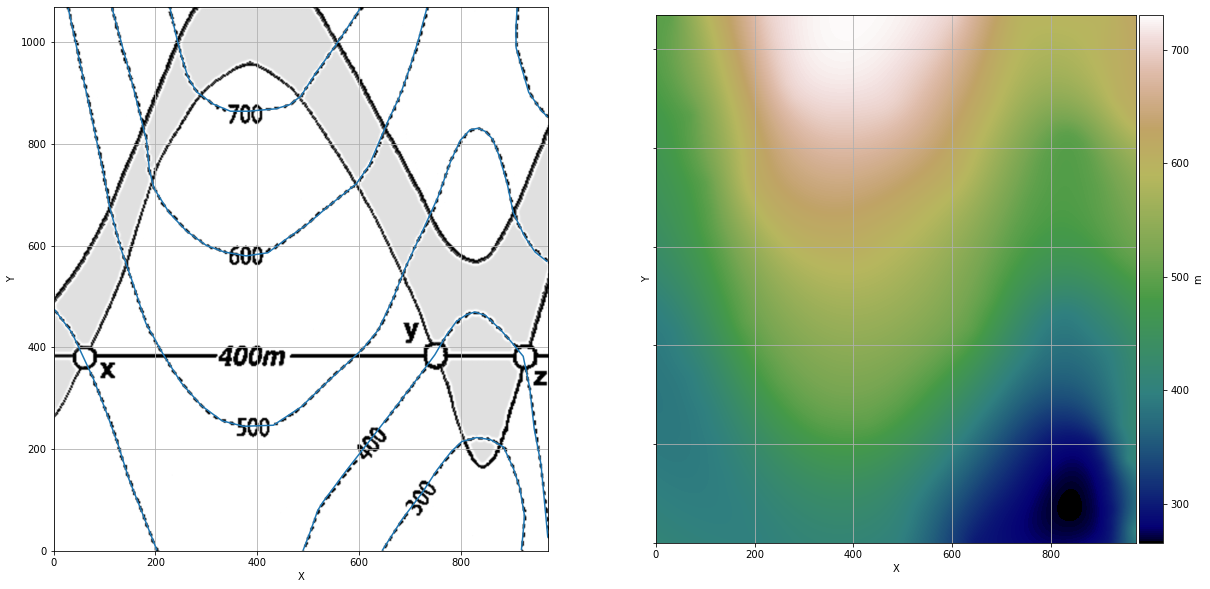

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(geological_map.read(1)), origin = 'lower', cmap ='gray')
topo.plot(ax=ax1)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(extent[2],extent[3])
ax1.set_xlim(extent[0],extent[1])
ax1.grid()
img = ax2.imshow(topo_interpolated, origin='lower', cmap = 'gist_earth')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(extent[2],extent[3])
ax2.set_xlim(extent[0],extent[1])
ax2.grid()
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(img, ax=ax2, cax=cax)
cbar.set_label('m')

## Sample from raster

`gg.raster.sample(...)` samples from the provided raster at a given point and returns the raster value at that point.

In [31]:
sample = gg.raster.sample(dem.read(1), extent, [500,500])
sample

562.0227

## Sample from raster randomly
`gg.raster.sample_randomly(...)` samples from the provided raster at a given point and returns the raster value at that point in addition to the coordinates of the sampled location.

In [32]:
sample = gg.raster.sample_randomly(dem.read(1), extent)
sample

(561.37537, [286.9444971351113, 502.2359459186903])

## Sample orientations from raster

`gg.raster.sample_orientations(...)` samples from the provided raster at a given locations and returns a DataFrame containing all necessary information.

<div class="alert alert-block alert-warning">
<b>Attention:</b> Sampling orientations from a raster should only be performed if the raster is NOT the digital elevation model but a already constructed subsurface layer!
</div>

In [33]:
orientations = gg.raster.sample_orientations(dem.read(1), extent, formation='surface')
orientations

X           Y           Z        dip     azimuth  polarity  \
0  961.172978  799.789085  557.568970  21.461330   26.596186       1.0   
1  272.591560  843.739602  677.206787  23.796598  322.063019       1.0   
2  100.335678  478.798179  454.024780  19.483067  301.490936       1.0   
3  883.154829  313.873525  367.523224  34.694557  283.063385       1.0   
4  279.717629  139.000544  446.905334  14.947213  293.457611       1.0   
5   18.824683  725.675185  441.373291  23.331587  284.689484       1.0   
6  205.702529  283.869379  466.557129  44.806278  317.323181       1.0   
7  477.809111   57.044561  413.387512  34.356583   67.113197       1.0   
8  558.042313  156.852847  407.576477  14.022923   56.024609       1.0   
9  572.804982  748.041687  617.064453  27.379185  291.237457       1.0   

  formation  
0   surface  
1   surface  
2   surface  
3   surface  
4   surface  
5   surface  
6   surface  
7   surface  
8   surface  
9   surface

It is also possible to provide a list of points with locations at which orientation values are being sampled. 

In [34]:
orientations = gg.raster.sample_orientations(dem.read(1), extent, points= [500,500],formation='surface')
orientations

X      Y           Z        dip    azimuth  polarity formation
0  500.0  500.0  562.022705  19.241863  40.721676       1.0   surface

In [35]:
orientations = gg.raster.sample_orientations(dem.read(1), extent, points= [[500,500], [600,600]],formation='surface')
orientations

X      Y           Z        dip    azimuth  polarity formation
0  500.0  500.0  562.022705  19.241863  40.721676       1.0   surface
1  600.0  600.0  555.283447  27.632013  55.799900       1.0   surface

## Sample interfaces from raster

`gg.raster.sample_interfaces(...)` samples from the provided raster at a given locations and returns a DataFrame containing all necessary information.

<div class="alert alert-block alert-warning">
<b>Attention:</b> Sampling interfaces from a raster should only be performed if the raster is NOT the digital elevation model but a already constructed subsurface layer!
</div>

In [36]:
interfaces = gg.raster.sample_interfaces(dem.read(1), extent, formation='surface')
interfaces

X           Y           Z formation
0  405.345389  770.026883  668.402283   surface
1    0.111172  323.193520  364.703308   surface
2  142.646726   98.709958  394.760864   surface
3  181.044925  369.404417  478.782288   surface
4  385.657985  575.995089  598.985413   surface
5  407.457068  732.499646  652.477417   surface
6  198.727587  938.707540  650.970093   surface
7   26.620741  716.729768  445.575073   surface
8  405.620268  597.239427  604.056335   surface
9  136.456104  211.770492  405.148621   surface

It is also possible to provide a list of point with locations at which interfaces are being sampled.

In [37]:
interfaces = gg.raster.sample_interfaces(dem.read(1), extent, points=[500,500],formation='surface')
interfaces

X      Y           Z formation
0  500.0  500.0  562.022705   surface

In [38]:
interfaces = gg.raster.sample_interfaces(dem.read(1), extent, points=[[500,500],[600,600]],formation='surface')
interfaces

X      Y           Z formation
0  500.0  500.0  562.022705   surface
1  600.0  600.0  555.283447   surface

<a id='ex5'></a>
# Example 5 - Clip Raster by Extent

Raster data obtained form external sources may not always fit the desired modeling extent. The function `gg.raster.clip_by_extent(...)` can be used to clip raster data to a provided extent. For this example, `raster1.tif`is loaded and clipped.

## Loading Data

In [39]:
geolmap = rasterio.open('../data/Test1/task1.tif')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')

## Original Raster Extent

In [40]:
raster_extent = gg.utils.set_extent(0,972,0,1069)
raster_extent

[0, 972, 0, 1069]

## Setting the Extent

In [41]:
extent = gg.utils.set_extent(250,750,250,750)
extent

[250, 750, 250, 750]

## Clipping the Data

In [42]:
raster_clipped = gg.raster.clip_by_extent(raster=dem, bbox=extent, bbox_crs='EPSG:4326', save=False)

## Plotting the Data

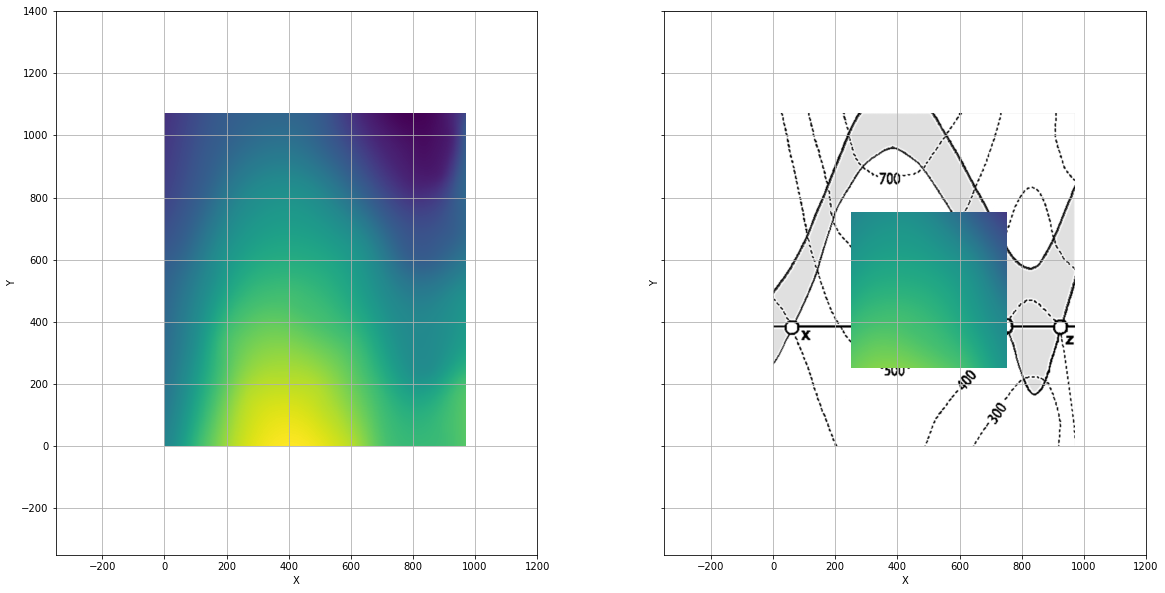

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, sharey=True,figsize=(20,10))
ax1.imshow(np.flipud(geolmap.read(1)), origin = 'lower', cmap ='gray')
ax1.imshow(dem.read(1),origin = 'lower', extent=raster_extent)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(-350,1400)
ax1.set_xlim(-350,1200)
ax1.grid()
ax2.imshow(np.flipud(geolmap.read(1)), origin = 'lower', cmap ='gray')
ax2.imshow(raster_clipped,origin = 'lower', extent=extent, vmin= dem.read(1).min(), vmax=dem.read(1).max())
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(-350,1400)
ax2.set_xlim(-350,1200)
ax2.grid()

<a id='ex6'></a>
# Example 6 - Clip Raster by Shape

A raster cannot only be clipped by an extent but also by a shape. This can be done using the function `gg.raster.clip_by_shape(...)`. `raster1.tif` is once again used for clipping.

## Loading Data

In [44]:
geolmap = rasterio.open('../data/Test1/task1.tif')
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
extent = gpd.read_file('../../gemgis/data/Test1/extent1_raster_clipping.shp')

## Original Raster Extent

In [45]:
raster_extent = gg.utils.set_extent(0,972,0,1069)
raster_extent

[0, 972, 0, 1069]

## Clipping the Data

In [46]:
raster_clipped = gg.raster.clip_by_shape(raster=dem, shape=extent, save=False)

## Plotting the Data

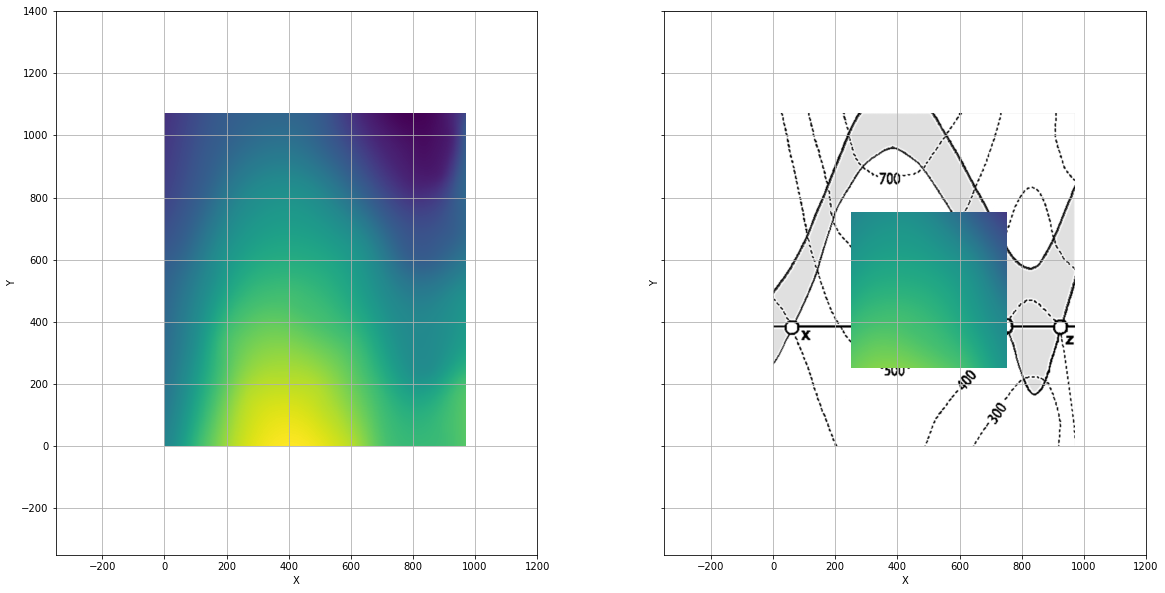

In [47]:
fig, (ax1, ax2) = plt.subplots(
    ncols=2, sharex=True, sharey=True, figsize=(20, 10))
ax1.imshow(np.flipud(geolmap.read(1)), origin='lower', cmap='gray')
ax1.imshow(dem.read(1), origin='lower', extent=raster_extent)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_ylim(-350, 1400)
ax1.set_xlim(-350, 1200)
ax1.grid()
ax2.imshow(np.flipud(geolmap.read(1)), origin='lower', cmap='gray')
ax2.imshow(raster_clipped, origin='lower', extent=gg.utils.set_extent(
    gdf=extent), vmin=dem.read(1).min(), vmax=dem.read(1).max())
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_ylim(-350, 1400)
ax2.set_xlim(-350, 1200)
ax2.grid()

<a id='ex7'></a>
# Example 7 - Save Raster as Tiff

Raster data created or manipulated within GemGIS can be saved to disk using `gg.raster.save_as_tiff(...)`. 

## Loading raw data and interpolate raster

For this example, we are using the data used in Example 2 and interpolate a raster based on contour lines. This new raster/array will then be saved to disk.

In [48]:
topo = gpd.read_file('../../gemgis/data/Test1/topo1.shp')

In [49]:
extent = gg.utils.set_extent(0,972,0,1069)
extent

[0, 972, 0, 1069]

In [50]:
topo_interpolated = gg.vector.interpolate_raster(topo, method='rbf')
topo_interpolated

array([[411.82014581, 411.69052091, 411.56158939, ..., 384.04962954,
        385.42140506, 386.76248969],
       [411.66101945, 411.5316941 , 411.40306465, ..., 384.4299191 ,
        385.80964238, 387.15718098],
       [411.5023835 , 411.37335931, 411.24503355, ..., 384.8252337 ,
        386.21293421, 387.56684012],
       ...,
       [499.18752484, 499.15158818, 499.11692808, ..., 624.97739453,
        625.38574125, 625.79305697],
       [499.53566482, 499.49887905, 499.4633306 , ..., 625.17315916,
        625.58165735, 625.98912699],
       [499.90110024, 499.86421238, 499.82858152, ..., 625.37307284,
        625.78164892, 626.18920124]])

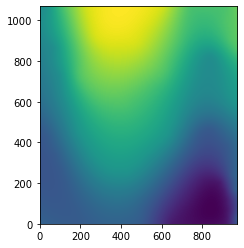

In [51]:
plt.imshow(topo_interpolated, origin='lower', extent=extent)

## Save raster

In [52]:
gg.raster.save_as_tiff('../data/Test1/test.tif', topo_interpolated, extent, 'EPSG:4326')

## Reload raster and plot

In [53]:
dem = rasterio.open('../data/Test1/test.tif')

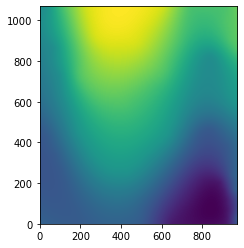

In [54]:
plt.imshow(dem.read(1), origin='lower', extent=extent)

<a id='ex8'></a>
# Example 8 - Additional Manipulation Options

Additional manipulation options for rasters are implemented in the following functions:

- `gg.raster.calculate_difference(...)` 
- `gg.raster.rescale_raster(...)`
- `gg.raster.rescale_by_array(...)`

## Rescale Raster

In [55]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
dem.read(1).shape

(275, 250)

In [56]:
dem_resized = gg.raster.resize_raster(dem, [0,972,0,1069])
dem_resized.shape

(1069, 972)

## Rescale Raster by array

In [57]:
dem = rasterio.open('../../gemgis/data/Test1/raster1.tif')
array = np.load('../../gemgis/data/Test1/array_rbf.npy')
print(dem.read(1).shape)
print(array.shape)

(275, 250)
(1069, 972)


In [58]:
dem_resized = gg.raster.resize_by_array(dem, array)
dem_resized.shape

(1069, 972)

## Calculate Difference

In [59]:
diff = gg.raster.calculate_difference(dem_resized, array, flip_array=True)
diff

array([[-16.51273354, -17.16587864, -17.05297727, ...,  -3.54311679,
         -3.90506201,  -4.72869099],
       [-15.8425801 , -16.49720058, -16.38419852, ...,  -3.34540037,
         -3.70726771,  -4.5304478 ],
       [-15.5287724 , -16.1840894 , -16.0720062 , ...,  -3.1493916 ,
         -3.51110746,  -4.33419466],
       ...,
       [-86.18124703, -86.49808465, -86.31980162, ..., -23.57712579,
        -24.79368372, -27.67548269],
       [-86.35254777, -86.66914527, -86.49055855, ..., -23.24394498,
        -24.45270878, -27.32658406],
       [-86.3989422 , -86.71502653, -86.53616825, ..., -22.31174501,
        -23.51100467, -26.39234199]])

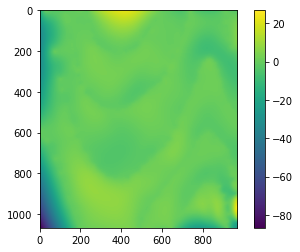

In [60]:
im = plt.imshow(diff)
cbar = plt.colorbar(im)

Text(0, 0.5, 'Frequency')

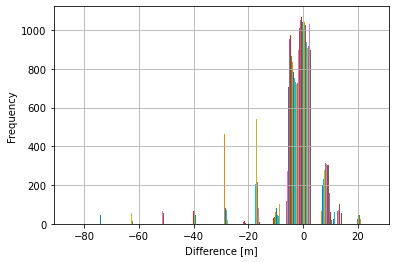

In [61]:
plt.hist(diff);
plt.grid()
plt.xlabel('Difference [m]')
plt.ylabel('Frequency')

# Version Report

In [62]:
import scooby
scooby.Report(additional=[gpd, rasterio, gg])

--------------------------------------------------------------------------------
  Date: Sat Jul 25 11:48:08 2020 W. Europe Daylight Time

                OS : Windows
            CPU(s) : 24
           Machine : AMD64
      Architecture : 64bit
               RAM : 63.9 GB
       Environment : Jupyter

  Python 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]

         geopandas : 0.6.1
          rasterio : 1.0.21
            gemgis : 0.0.x
             numpy : 1.18.5
             scipy : 1.5.0
           IPython : 7.16.1
        matplotlib : 3.2.2
            scooby : 0.5.2

  Intel(R) Math Kernel Library Version 2020.0.1 Product Build 20200208 for
  Intel(R) 64 architecture applications
--------------------------------------------------------------------------------